In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task3-aqi.ipynb")

# Task 3: Visualizing AQI during the 2017 Thomas Fire in Santa Barbara County

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/ryangreen6/eds220-hwk2


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- **Every code cell should have a comment.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

## About the data

In this task you will use [Air Quality Index (AQI)](https://www.airnow.gov/aqi/aqi-basics/) data from the [US Environmental Protection Agency](https://www.epa.gov) to visualize the impact on the AQI of the 2017 [Thomas Fire](https://en.wikipedia.org/wiki/Thomas_Fire) in Santa Barbara County.

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

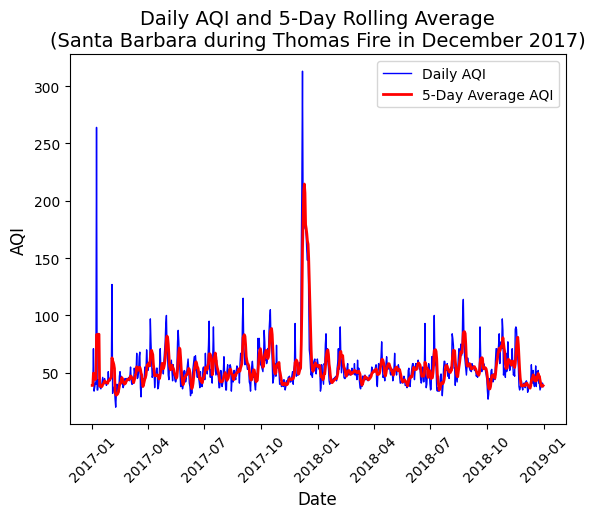

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

aqi_17 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip', compression = 'zip')
aqi_18 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip', compression = 'zip')

aqi = pd.concat([aqi_17, aqi_18])

aqi.columns = (aqi.columns.str.lower().str.replace(' ','_'))

aqi_sb = aqi[aqi['county_name'] == 'Santa Barbara']
aqi_sb = aqi_sb.drop(columns=['state_name', 'county_name', 'state_code', 'county_code'])

aqi_sb['date'] = pd.to_datetime(aqi_sb['date'])
aqi_sb = aqi_sb.set_index('date')

aqi_sb['five_day_average'] = aqi_sb['aqi'].rolling('5D').mean()

plt.plot(aqi_sb.index, aqi_sb['aqi'], label='Daily AQI', color='blue', linewidth=1)
plt.plot(aqi_sb.index, aqi_sb['five_day_average'], label='5-Day Average AQI', color='red', linewidth=2)

plt.title('Daily AQI and 5-Day Rolling Average\n(Santa Barbara during Thomas Fire in December 2017)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('AQI', fontsize=12)

plt.legend()
plt.xticks(rotation=45)

plt.show()


## 1

a. Read the [Air Quality Index (AQI) Basics](https://www.airnow.gov/aqi/aqi-basics/) from the AirNow.gov portal.

b. Go to [EPA's website on Air Quality Data Collected at Outdoor Monitors Across the US](https://www.epa.gov/outdoor-air-quality-data). 

c. Under "Donwload Data", click on "Pre-generated Data Files".

d. Read the "About the data" section.

## 2
a. Back in the "Pre-generated Data Files" site, click on "Tables of Daily AQI".

b. Copy the URL to the 2017 Daily AQI **by County** ZIP file `daily_aqi_by_county_2017.zip`

Notice we'll be reding the data directly from its ZIP file link. This ZIP file contains a single CSV that has been compressed to save space. 

<!-- BEGIN QUESTION -->

c. In the next code cell read in the data from the URL using the [`pd.read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function with the `compression='zip'` parameter added and store it as `aqi_17`. 

d. In the same cell, read in the data for the 2018 Daily AQI by County ZIP file and store it as `aqi_18`.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read in data
aqi_17 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip', compression = 'zip')
aqi_18 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip', compression = 'zip')

<!-- END QUESTION -->

## 3
a. and b. Use the next two code cells to look at the head of both data frames. Store your results in `aqi_17_head` and `aqi_18_head`. 

In [ ]:
# a.
aqi_17_head = aqi_17.head
aqi_17_head

In [ ]:
# b.
aqi_18_head = aqi_18.head
aqi_18_head

<!-- BEGIN QUESTION -->

c. Use this code cell to make some other preliminary data exploration of your choosing.

In [ ]:
print(aqi_17.isnull().sum())
print(aqi_18.isnull().sum())

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

d. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

I chose `isnull().sum()` to get a summary of any NA values in the dataframes.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 4
We currently have two separate data frames. For this exercise we will need to "glue" them one on top of the other. The `pandas` function `pd.concat()` can achieve this. 

Pass `[aqi_17, aqi_18]` as the input of `pd.concat()` and store the output as  `aqi`.  
In the next line run `aqi`.

NOTE: When we concatenate data frames like this, without any extra parameters for `pd.concat()` the indices for the two dataframes are just "glued together", the index of the resulting dataframe is not updated to start from 0. Notice the mismatch between the index of `aqi` and the number of rows i the complete data frame.


In [ ]:
aqi = pd.concat([aqi_17, aqi_18])
aqi

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 5

Run the following code cell and use the next markdown cell to give a line by line explanation of the code below the comment "#Simplify column names". You might need to look up the `pandas` documentation.

In [ ]:
print(aqi.columns, '\n')

In [ ]:
# Initial column names: notice caps and spaces (difficult to work with!)
print(aqi.columns, '\n')

# Simplify column names
aqi.columns = (aqi.columns
                  .str.lower()
                  .str.replace(' ','_')
                )
print(aqi.columns, '\n')

This code chunk takes all the column names and puts them in the same format: no capitals and underscores instead of any spaces. 
First it identifies the columns using `aqi.columns`, then `str.lower()` to make all column names lower case. Finally, `str.replace()` replaces any spaces with underscores. 


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 6
In the next code cell:

a. Select only data from `Santa Barbara` county and store it in a new variable `aqi_sb`.

b. Remove the `state_name`, `county_name`, `state_code` and `county_code` columns from `aqi_sb`.

Your dataframe should have the following columns in this order: `date`, `aqi`, `category`, `defining_parameter`, `defining_stie`, `number_of_sites_reporting`. 

In [ ]:
aqi_sb = aqi[aqi['county_name'] == 'Santa Barbara']
aqi_sb = aqi_sb.drop(columns=['state_name', 'county_name', 'state_code', 'county_code'])
aqi_sb

<!-- END QUESTION -->

 
c. What is the data type of the `date` column? Store your answer in the `date_type` variable. Your answer should contain the type for the **date column only**. 

In [ ]:
date_type = aqi['date'].dtype

<!-- BEGIN QUESTION -->

## 7
In the following cell:
1. Update the date column of `aqi_sb` to be a `pandas.datetime` object.
2. Update the index of `aqi_sb` to be the `date` column.

In [ ]:
aqi_sb['date'] = pd.to_datetime(aqi_sb['date'])
aqi_sb = aqi_sb.set_index('date')
aqi_sb

<!-- END QUESTION -->

## 8
In the next cell we will calculate an average over a [rolling window](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html) using the `rolling()`method for `pandas.Series`:

- `rolling()` is a lazy method, so we need to specify what we want to calculate over each window before it does something. 
- in this example we use the aggregator function `mean()` to calculate the average over each window
- the parameter '5D' indicates we want the window for our rolling average to be 5 days. 
- we get a `pandas.Series` as ouput

Store your answer in the `rolling_average` variable. You should have two columns in your series, `date` and the averages. 

In [ ]:
# Calculate AQI rolling average over 5 days
rolling_average = aqi_sb.rolling('5D').mean()
rolling_average

## 9 

Without creating any new variables, add the mean of the AQI over a 5-day rolling window as a new column named `five_day_average` to the `aqi_sb` dataframe. 

In [ ]:
aqi_sb['five_day_average'] = aqi_sb['aqi'].rolling('5D').mean()

<!-- BEGIN QUESTION -->

## 10
Make a line plot showing both the daily AQI and the 5-day average (5-day average on top of the AQI). Make necessary updates for the plot to be accurate, informative, and polished, even if simple. You're welcome to use plotting methods and packages beyond what we have covered in class! 

Can you see the AQI going up during the Thomas Fire in December 2017?

In [ ]:
plt.plot(aqi_sb.index, aqi_sb['aqi'], label='Daily AQI', color='blue', linewidth=1)
plt.plot(aqi_sb.index, aqi_sb['five_day_average'], label='5-Day Average AQI', color='red', linewidth=2)

plt.title('Daily AQI and 5-Day Rolling Average\n(Santa Barbara during Thomas Fire in December 2017)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('AQI', fontsize=12)

plt.legend()
plt.xticks(rotation=45)

plt.show()


## 10

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).